# TP algorithmes sur les arbres binaires de recherche

## Travail préparatoire

1. Télécharger depuis github dans votre dossier personnel les fichiers `TP_algorithme_sur_arbres_binaires_de_recherche.ipynb` et `visualisation_arbre.py` (module nécessaire pour le TP)

* Toutes les réponses à apporter au TP devront être faites dans le fichier `TP_algorithme_sur_arbres_binaires_de_recherche.ipynb` et il devra être redéposé dans votre github.

* Dans ce TP :
    * On utilisera la classe `ABR` ci-dessous munies de cinq **méthodes** (plus la **méthode spéciale** `__repr__`, servant uniquement en cas de debugage)
    * On choisit de représenter un arbre vide par `None`
    * On a aussi deux **fonctions** `parcours_infixe` et `est_vide` qui portent bien leur nom...


* **Aucune modification n'est demandée sur toutes ces méthodes et fonctions !!**

* **Compléter ce notebook et, pour le rendre, sauvegarder-le dans votre github**

In [1]:
from visualisation_arbre import *

class ABR:
    def __init__(self, valeur, gauche, droit):
        self.valeur = valeur
        self.gauche = gauche
        self.droit = droit
    
    def get_data(self):
        return self.valeur
    
    def get_SAG(self):
        return self.gauche
    
    def get_SAD(self):
        return self.droit
    
    def set_SAG(self, arbre):
        self.gauche = arbre
    
    def set_SAD(self, arbre):
        self.droit = arbre
        
    def __repr__(self):
        chaine = ''
        for val in parcours_infixe(self):
            chaine += str(val) + ' ' 
        return chaine

def est_vide(abr):
    return abr is None      
    
def parcours_infixe(arbre):
    def parcours_infixe2(arbre, liste):
        if est_vide(arbre):
            liste = []
            return

        gauche = arbre.get_SAG()
        if not(est_vide(gauche)):
            parcours_infixe2(gauche, liste)

        liste.append(arbre.get_data())

        droit = arbre.get_SAD()    
        if not(est_vide(droit)):
            parcours_infixe2(droit, liste)
    
    l = []
    parcours_infixe2(arbre, l)
    return l

2. Donner succintement le rôle des méthodes `get_data`, `get_SAG`, `get_SAD`, `set_SAG` et `set_SAD`. Pour chacune d'elle, préciser si elle renvoie un résultat (et son type) et/ou si elle modifie l'arbre.

* `get_data` : donne la valeur du noeud racine => int
* `get_SAG` : renvoie le sous-arbre gauche => objet de la classe ABR
* `get_SAD` : renvoie le sous-arbre droit => objet de la classe ABR
* `set_SAG`: modifie le sous-arbre gauche => ne renvoie rien
* `set_SAD`: modifie le sous-arbre droit => ne renvoie rien

> **Attention pour toute la suite du TP :** Ces cinq méthodes constituent l'**interface** par lequel on manipule l'arbre. Dans toutes les fonctions que vous devrez écrire dans ce TP, il faudra se servir de cette interface ainsi que des deux fonctions `parcours_infixe` et `est_vide`. **IL EST DONC INTERDIT DE MANIPULER DIRECTEMENT LES ATTRIBUTS DE L'ARBRE**

3. Construire l'ABR appelé $A$ ci-dessous :

![click droit pour afficher l'image](img/Exemple_arbre_binaire_de_recherche.png)

In [131]:
a = ABR(6,ABR(4,None,None),ABR(7,None,None))
b = ABR(10,None,ABR(14,ABR(13,None,None),None))
A = ABR(8,ABR(3,ABR(1,None,None),a),b)

arbre_vide = None

5. Afficher cet arbre pour vérifier votre code en exécutant la cellule ci-dessous

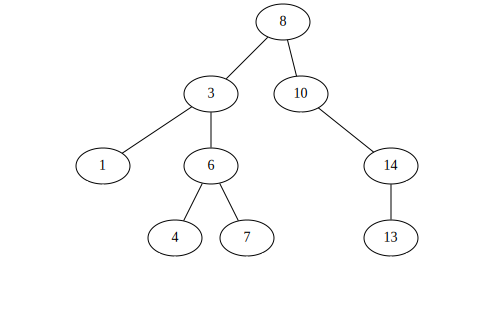

In [91]:
show_tree(A)

## Partie 1

1. A l'aide des explications sur la recherche et l'ajout d'une valeur dans un ABR données dans le cours `algorithmes sur les arbres binaires`, écrire le code python de deux **fonctions** :
* La fonction `recherche` qui :
    * prend en paramètres un ABR et une valeur
    * renvoie `True` si cette valeur est dans l'arbre et `False` sinon
* La fonction `ajout` qui : 
    * prend en paramètres un ABR et une valeur
    * renvoie un nouvel ABR dans lequel la valeur a été insérée.

In [116]:
def recherche(abr, val):
    if abr is None:
        return False
    x = abr.get_data()
    if x == val:
        return True
    elif val < x:
        return recherche(abr.get_SAG(), val)
    elif val > x:
        return recherche(abr.get_SAD(), val)

acorriger = """def ajout(abr, val):
    if abr is None:
        return ABR(val,None,None)
    elif abr.get_SAD() is None and abr.get_SAG() is None:
        if val <= abr.get_data():
            abr.set_SAG(ABR(val,None,None))
            return abr
        else:
            abr.set_SAD(ABR(val,None,None))
            return abr
    elif val <= abr.get_data():
        ajout(abr.get_SAG(), val)
        return abr
    else:
        ajout(abr.get_SAD(), val)
        return abr"""
    
def ajout2(abr, val):
    if abr is None:
        return ABR(val,None,None)
    elif val <= abr.get_data() :
        abr.set_SAG(ajout2(abr.get_SAG(),val))
        return abr
    else:
        abr.set_SAD(ajout2(abr.get_SAD(),val))
        return abr

2. Ecrire quelques appels permettant de vérifier le bon fontionnement de ces deux fonctions. Pour cela, écrire :

* Au moins un appel qui permet de rechercher une valeur qui se trouve effectivement dans $A$
* Au moins un appel qui permet de rechercher une valeur qui ne se trouve pas dans $A$
* Au moins un appel qui permet d'ajouter une valeur dans un arbre vide
* Au moins un appel qui permet d'ajouter une valeur dans $A$. Le nouvel arbre obtenu doit toujours être un ABR !!
* Au moins un appel qui permet d'ajouter une valeur déjà présente dans $A$. Le nouvel arbre obtenu doit toujours être un ABR !!

True
False


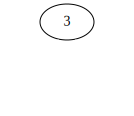

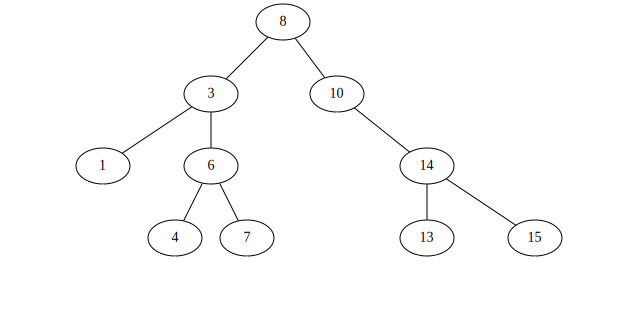

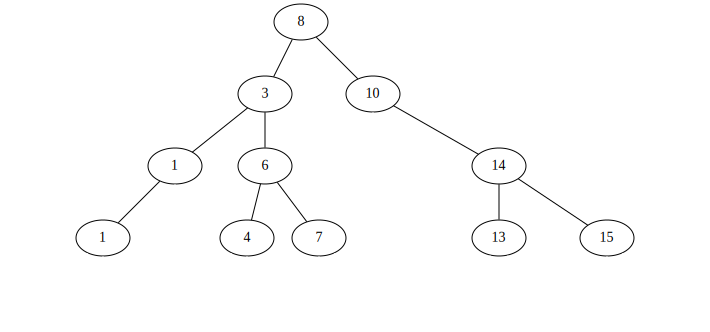

In [119]:
# Ecrire votre code python ici

print(recherche(A,6))


print(recherche(A,2))


show_tree(ajout(arbre_vide,3))


ajout2(A,15)
show_tree(A)


ajout2(A,1)
show_tree(A)


3. Ecrire le code d'une fonction `ajout_si_non_present` (**sans utiliser la fonction `recherche`**)qui : 
    * prend en paramètres un ABR et une valeur
    * renvoie un nouvel ABR dans lequel la valeur a été insérée uniquement si la valeur n'appartient pas à l'arbre.
    * renvoie un ABR identique si la valeur appartient déjà à l'arbre

In [130]:
def ajout_si_non_present(abr, val):
    if abr is None:
        return ABR(val,None,None)
    elif val == abr.get_data():
        return abr
    elif val <= abr.get_data() :
        abr.set_SAG(ajout_si_non_present(abr.get_SAG(),val))
        return abr
    else:
        abr.set_SAD(ajout_si_non_present(abr.get_SAD(),val))
        return abr

**Exécuter à nouveau la cellule qui génère l'arbre $A$ avant de passer à cette question**

4. Ecrire quelques appels permettant de vérifier le bon fontionnement de `ajoute_si_non_present`. Pour cela écrire :
* Au moins un appel qui permet d'ajouter une valeur dans un arbre vide
* Au moins un appel qui permet d'ajouter une valeur dans $A$ non déjà présente. Le nouvel arbre obtenu doit toujours être un ABR !!
* Au moins un appel qui permet d'ajouter une valeur déjà présente dans $A$. Le nouvel arbre obtenu doit toujours être un ABR !!

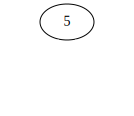

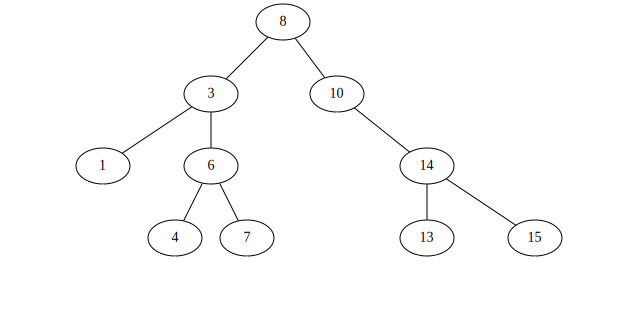

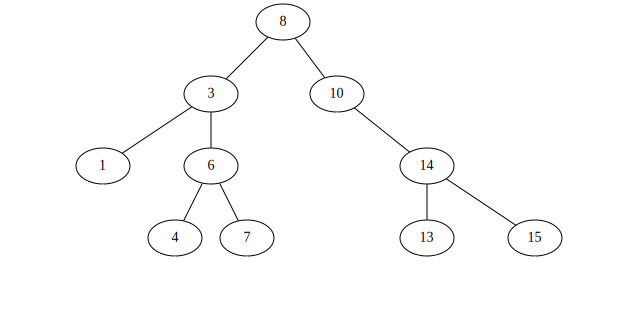

In [135]:
# Ecrire votre code python ici

show_tree(ajout_si_non_present(arbre_vide,5))


show_tree(ajout_si_non_present(A,15))


show_tree(ajout_si_non_present(A,1))

## Partie 2

1. Rappeler le résultat remarquable vu en dans `bloc5/TD_algorithmes_de_parcours_des_arbres_binaires` lorsqu'on fait un parcours infixe sur un arbre binaire **de recherche**. Ce résultat sera utile pour la suite...

Le parcours infixe permet de parcourir les noeuds d'un ABR selon leurs valeurs croissantes

2. Compléter le code des fonctions ci-dessous après avoir lu leur documentation. **Attention :**

* Traiter les fonctions **dans l'ordre**
* Bien réfléchir à une stratégie ou un pseudo-code **avant** d'écrire le code pyhton !!

In [ ]:
def construit_ABR(liste_valeurs):
    '''
    Rôle de la fonction : construit un ABR à partir de valeurs fournies dans une liste
    liste_valeurs (type list) : liste contenant les valeurs qui devront composer l'ABR
    return (type ABR) : ABR construit avec cette liste de valeurs
    Conseil : Utiliser la fonction `ajoute`
    '''
    # A compléter

    
def minimum(abr):
    '''
    Rôle de la fonction : renvoie la valeur minimale d'un ABR
    abr (type ABR) : un ABR
    return (même type que les noeuds de l'arbre) : valeur minimale de l'arbre
    Précondition : # A compléter et à tenir compte dans le code
    Consignes : interdiction d'utiliser la fonction `parcours_infixe`
    '''
    # A compléter


def maximum(abr):
    '''
    Rôle de la fonction : renvoie la valeur maximale d'un ABR
    abr (type ABR) : un ABR
    return (même type que les noeuds de l'arbre) : valeur maximale de l'arbre
    Précondition : # A compléter et à tenir compte dans le code
    Consignes : obligation tion d'utiliser la fonction `parcours_infixe`
    '''
    # A compléter

    
def est_ABR(arbre):
    '''
    Rôle de la fonction : détermine si un arbre binaire est un arbre binaire de recherche
    arbre (type ABR) : un arbre binaire
    return (type bool) : True si l'arbre binaire est un ABR, False sinon
    Conseil : Utiliser la fonction parcours_infixe
    '''
    # A compléter

    
def tri(liste):
    '''
    Rôle de la fonction : trie une liste de valeur
    liste (list) : liste à trier contenant des entiers, des réels ou des chaînes de caractères
    return (list) : liste triée
    Conseil : Utiliser la structure d'ABR et la fonction parcours_infixe
    '''
    # A compléter

3. Ecrire les appels qui permettent d'afficher la valeur maximale et minimale contenu dans $A$

In [ ]:
# Ecrire votre code python ici

4. Ecrire les appels qui permettent d'afficher la valeur maximale et minimale contenu dans un arbre vide. Quel résultat obtenez-vous ? Pourquoi ? Est-ce le comportement attendu ?

In [ ]:
# Ecrire votre code python ici

# Ecrire les réponses à la question ici

In [ ]:
# Ecrire votre code python ici

# Ecrire les réponses à la question ici

5. Ecrire les lignes de code permettant de construire l'arbre $A1$ ci-dessous. Donner une raison pour laquelle cet arbre n'est pas un ABR.

![click droit pour afficher l'image](img/arbre_non_abr.png)

In [ ]:
# Ecrire votre code python ici

# Ecrire les réponses à la question ici

6. A l'aide des arbres $A$ et $A1$, écrire les lignes de code permettant de tester la fonction `est_ABR`

In [ ]:
# Ecrire votre code python ici

7. A l'aide de la fonction `construit_ABR`, créer les arbres $A2$ et $A3$, à partir de leurs listes respectives de valeurs `[6, 8, 4, 5, 2, 9]` et `[4, 9, 6, 2, 5, 8]`. Puis demander à python de vérifier que ces arbres sont bien des ABR.

In [ ]:
# Ecrire votre code python ici

8. Vrai ou faux : un ABR possédant un ensemble de noeuds donnés est nécessairement unique. **Justifier votre réponse** à l'aide de la question précédente.